In [1]:
import sys
import os
import os.path as op

import numpy as np
import pandas as pd
import datetime
import xarray as xr

# dev library
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..'))

# dependencies
from lib import sat, plot_sat
from lib.config import *


# Visualization of Satellite passes

In [2]:
est = xr.open_dataset(op.join(p_data,'Estela_samoa.nc'), decode_times=False)

est = est.sel(time='ALL')
est = est.assign({'estela_mask':(('latitude','longitude'),np.where(est.F.values>0,1,np.nan))})
estela_mask = est.estela_mask # mask for slp

fneed = pd.read_pickle(op.join(p_data, 'CFO_region.pkl'))

**Extract coordinates of both nadir sides track**

In [3]:
ds_data = sat.lonlat_track(fneed, estela_mask)

 File number: 150/151

In [5]:
ds_data.to_netcdf(op.join(p_output, 'ds_dataTracks.nc'))

In [ ]:
ds_data = xr.open_dataset(op.join(p_output, 'ds_dataTracks.nc'))

## 4. Plot satellite tracks

In [6]:
lon = np.concatenate(np.concatenate(ds_data.longitude.values))
lat = np.concatenate(np.concatenate(ds_data.latitude.values))

In [7]:
figsize=(25,15)
title = ''
ax = plot_sat.global_map(lon, lat, estela_mask, title, figsize)

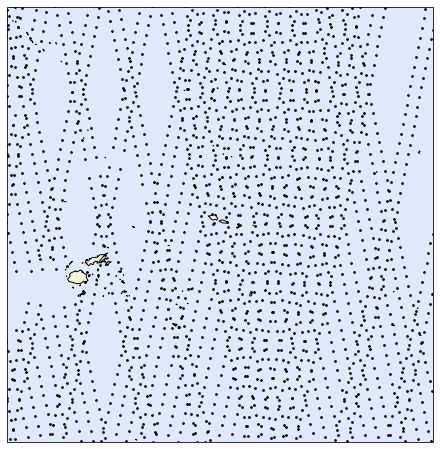

In [8]:
figsize=(8,8)
title = ''
ax = plot_sat.site_map(lon, lat, title, figsize)

**Resample datetime colorbar**

In [9]:
time_obvs = pd.DataFrame(np.concatenate(ds_data.time.values)).dropna()

In [10]:
year_init = pd.DatetimeIndex([time_obvs.values.min()]).year[0]
month_init = pd.DatetimeIndex([time_obvs.values.min()]).month[0]
day_init = pd.DatetimeIndex([time_obvs.values.min()]).day[0]

year_end = pd.DatetimeIndex([time_obvs.values.max()]).year[0]
month_end = pd.DatetimeIndex([time_obvs.values.max()]).month[0]
day_end = pd.DatetimeIndex([time_obvs.values.max()]).day[0]+1

In [11]:
init_time = datetime.datetime(year_init, month_init, day_init)
end_time = datetime.datetime(year_end, month_end, day_end)

df_comp = pd.DataFrame({'time':[init_time, end_time]})

In [12]:
df_comp

time
0 2021-02-13
1 2021-02-24

## Time coverage of tracks over the area

In [13]:
data_merged = ds_data.to_dataframe().reset_index().dropna()
data_merged = pd.concat([df_comp, data_merged])

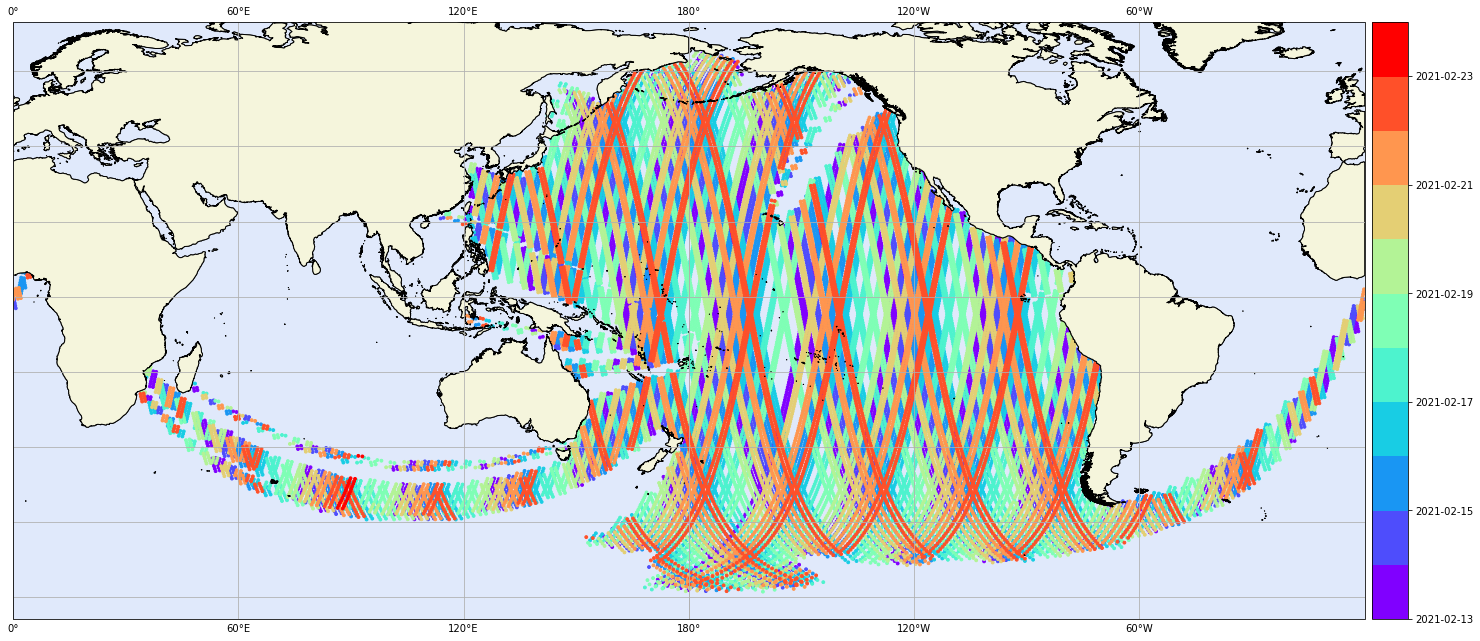

In [14]:
figsize=(25,15)
title = ''
fig = plot_sat.timepass_map(data_merged, title, figsize)